In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib

from pathlib import Path
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from pathlib import Path
from pymatgen.core import Structure, Composition, Element

# user-friendly print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def convert_composition(comp: str) -> Composition:
    try:
        return Composition(comp)
    except:
        return None

In [3]:
qc_ac_dataset = pd.read_pickle('common_data/qc_ac_te_dataset_T=290K_20250118.pd.xz')
qc_ac_log_dataset = pd.read_pickle('common_data/qc_ac_te_dataset_val=log_T=290K_20250118.pd.xz')
qc_ac_log_dataset = qc_ac_log_dataset.set_index([[f'qat_{i}' for i in qc_ac_log_dataset.index]], drop=True)

qc_ac_dataset.head(3)
qc_ac_dataset.shape

qc_ac_log_dataset.head(3)
qc_ac_log_dataset.shape

,formula,hypermaterial_type,property,unit,temperature,property_value,sample_id,DOI,composition,elements,SID
0,Al61.5Cu26.5Fe12,IQC,Seebeck coefficient,V*K^(-1),290,-1.1863527516689362e-05,57966,10.1007/s11664-014-3204-4,"(Al, Cu, Fe)","(Al, Cu, Fe)",NaN
1,Al61.5Cu26.5Fe12,IQC,Thermal conductivity,W*m^(-1)*K^(-1),290,1.4258964578008275,57966,10.1007/s11664-014-3204-4,"(Al, Cu, Fe)","(Al, Cu, Fe)",NaN
2,Ag42.25In42.25Yb15.5,IQC,Electrical resistivity,ohm*m,290,2.0436187897844928e-06,35352,10.1103/physrevb.72.054202,"(Ag, In, Yb)","(Ag, In, Yb)",NaN


(14204, 11)

,formula,hypermaterial_type,sample_id,composition,elements,thermal_conductivity,seebeck_coefficient,electrical_resistivity,power_factor,zt,hall_coefficient,thermal_diffusivity,specific_heat_capacity,specific_heat
qat_0,(ErAs)0.003InGaAs,others,19588,"(Er, As, In, Ga)","(Er, As, In, Ga)",1.183887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qat_1,Al61.5Cu26.5Fe12,IQC,57966,"(Al, Cu, Fe)","(Al, Cu, Fe)",0.354801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qat_2,Ca2.98Eu0.02Co3.95Ga0.05O9,others,19291,"(Ca, Eu, Co, Ga, O)","(Ca, Eu, Co, Ga, O)",NaN,-8.797439,-8.940652,-8.667596,NaN,NaN,NaN,NaN,NaN


(7369, 14)

/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_190996/1023824939.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


[Text(0, 0, 'Thermal conductivity'),
 Text(1, 0, 'Electrical resistivity'),
 Text(2, 0, 'Power factor'),
 Text(3, 0, 'Seebeck coefficient'),
 Text(4, 0, 'ZT'),
 Text(5, 0, 'Hall coefficient'),
 Text(6, 0, 'Thermal diffusivity'),
 Text(7, 0, 'Specific heat')]

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/.miniforge3/envs

[Text(0, 0, 'Thermal conductivity'),
 Text(1, 0, 'Electrical resistivity'),
 Text(2, 0, 'Power factor'),
 Text(3, 0, 'Seebeck coefficient'),
 Text(4, 0, 'ZT'),
 Text(5, 0, 'Hall coefficient'),
 Text(6, 0, 'Thermal diffusivity'),
 Text(7, 0, 'Specific heat'),
 Text(8, 0, '')]

Text(0.5, 0, '')

Text(0, 0.5, '')

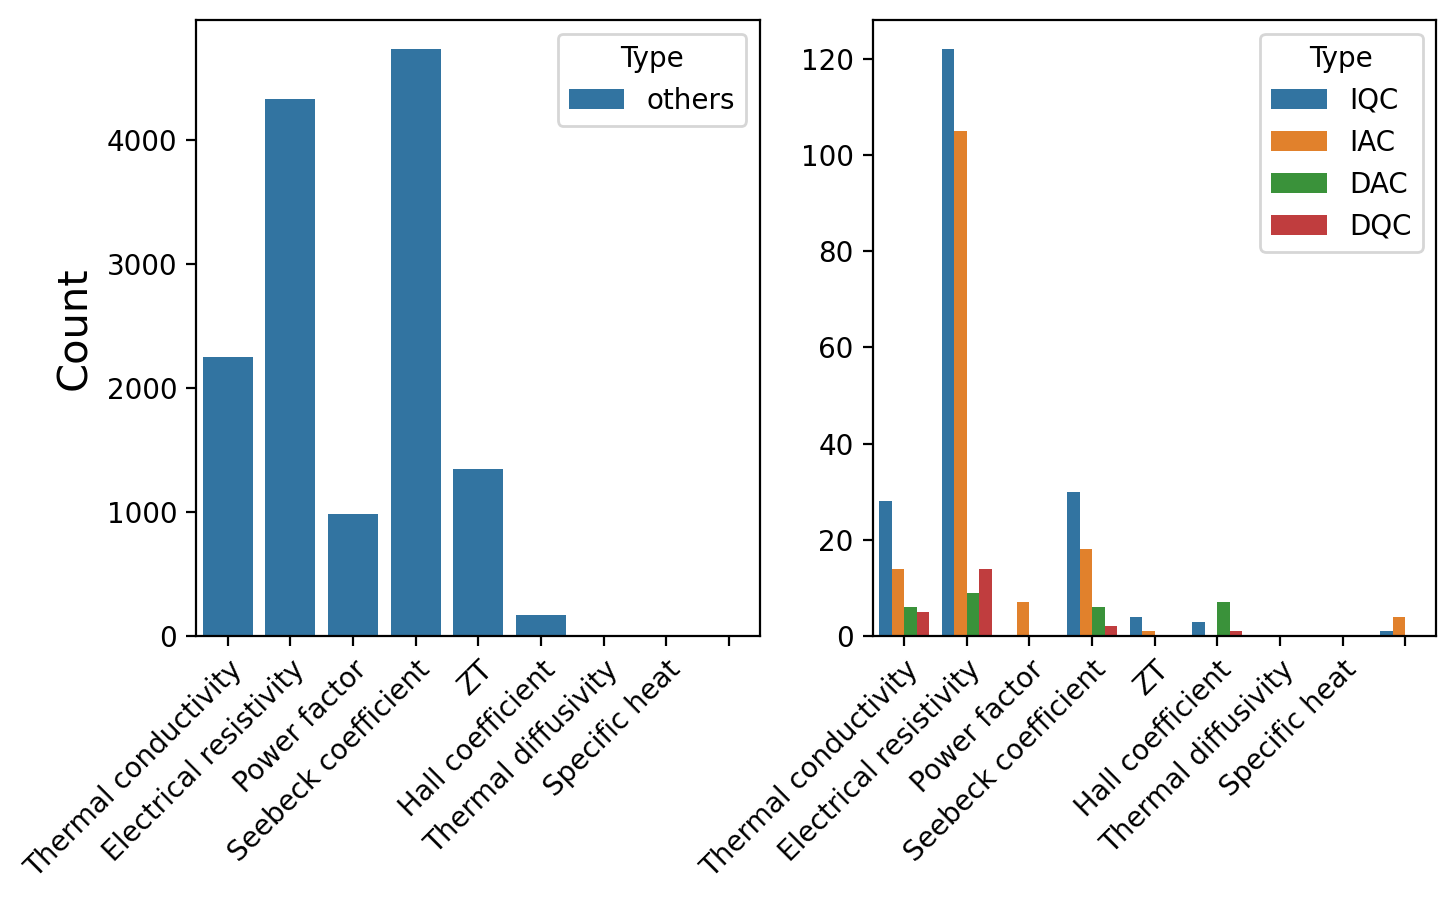

In [5]:
tmp = qc_ac_dataset[qc_ac_dataset.hypermaterial_type == 'others']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=200, sharex=True)

ax = sns.countplot(tmp, x="property", hue='hypermaterial_type', ax=ax1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax.set_ylabel("Count", fontsize=15)
ax.set_xlabel(None)
ax.legend(title='Type')

tmp = qc_ac_dataset[qc_ac_dataset.hypermaterial_type != 'others']
ax = sns.countplot(tmp, x="property", hue='hypermaterial_type', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.legend(title='Type')

---

In [4]:
props = [
    'thermal_conductivity', 'seebeck_coefficient', 'electrical_resistivity',
    'power_factor', 'zt', 'hall_coefficient',
]

qc_ac_log_data = qc_ac_log_dataset[props]

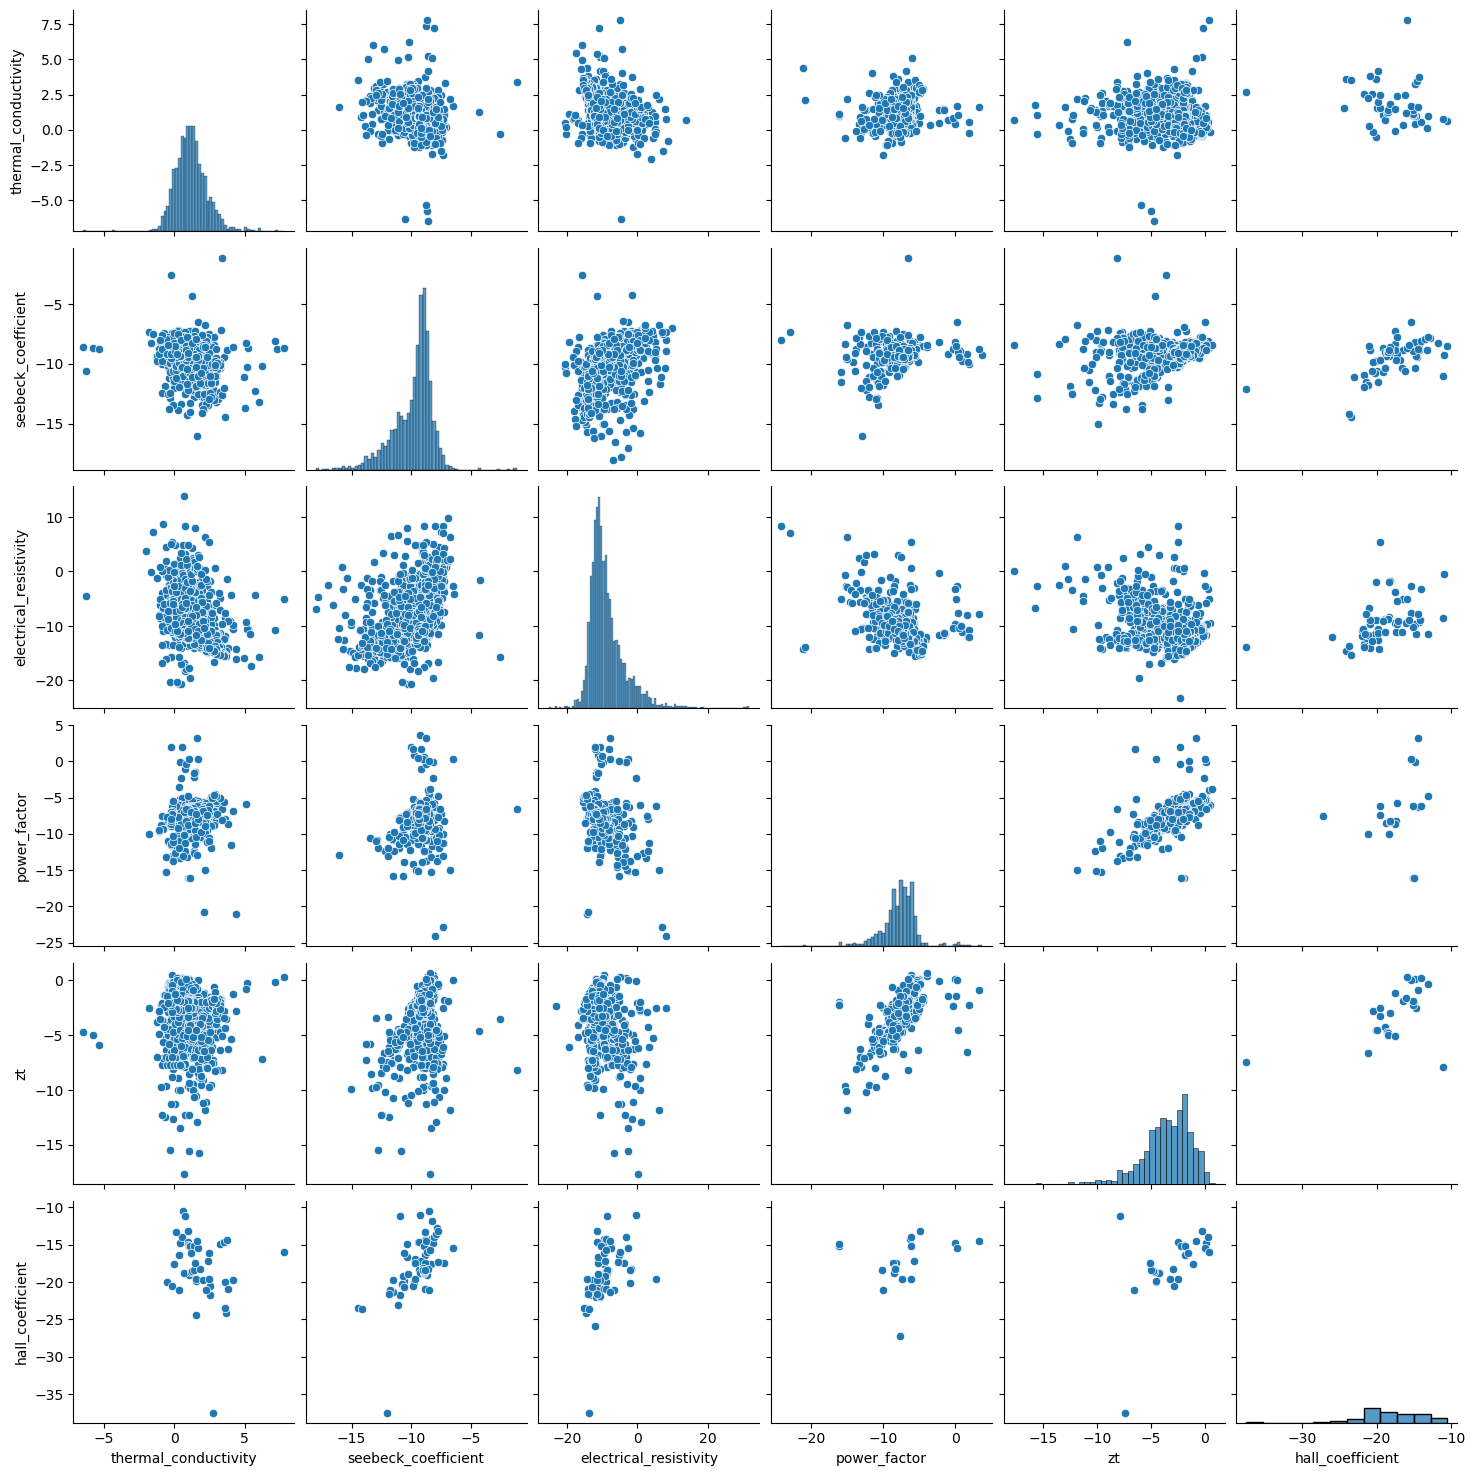

In [19]:
sns.pairplot(qc_ac_log_data)

----

In [5]:
from xenonpy.descriptor import Compositions
from sklearn.preprocessing import MinMaxScaler, StandardScaler

featurizers = ['WeightedAverage', 'WeightedVariance', 'MaxPooling', 'MinPooling']
comp_calc = Compositions(featurizers=featurizers, n_jobs=20)  # use specific featurizers

Read icsd and MP dataset

In [6]:
from pymatgen.core import Composition

icsd_dataset = pd.read_pickle('common_data/icsd_inorganic_ordered_structure_20230522.pd.xz')
icsd_dataset = icsd_dataset.set_index([[f'icsd_{i}' for i in icsd_dataset.index]], drop=True)
icsd_dataset.composition = icsd_dataset.composition.apply(lambda s: Composition.from_dict(s).remove_charges().as_dict())
mp_dataset = pd.read_pickle('common_data/mp_inorganic_v2024.12.18.pd.xz')

icsd_dataset.shape
icsd_dataset.head(3)

mp_dataset.shape
mp_dataset.head(3)

(110581, 21)

,structure,full_formula,composition,is_ordered,space_group_num,space_group,wy_pattern,wy_hist,sg_wy,ratio,...,structured_formula,chemical_name,cell_volume,formula_weight,temperature,pressure,ab_formula,calculated_density,quality,publication_year
icsd_1,"{'@module': 'pymatgen.core.structure', '@class...",Cr4 Te8 O22,"{'Cr': 4.0, 'Te': 8.0, 'O': 22.0}",True,14.0,P2_1/c,"{'O': ['a', 'e', 'e', 'e', 'e', 'e'], 'Cr': ['...","{'a': 0.1111111111111111, 'e': 0.8888888888888...",14_a-2_e-4_e-4_e-4_e-4_e-4_e-4_e-4_e-4,"(4.0, 8.0, 22.0)",...,Cr2 Te4 O11,Dichromium(III) undecaoxo-tetratellurate(IV),507.61,790.389,293.0,0.101325,A2B4C11,5.17,10,1976
icsd_2,"{'@module': 'pymatgen.core.structure', '@class...",Na4 P4 H16 O20,"{'Na': 4.0, 'P': 4.0, 'H': 16.0, 'O': 20.0}",True,33.0,Pna2_1,"{'H': ['a', 'a', 'a', 'a'], 'O': ['a', 'a', 'a...",{'a': 1.0},33_a-4_a-4_a-4_a-4_a-4_a-4_a-4_a-4_a-4_a-4_a-4,"(4.0, 4.0, 16.0, 20.0)",...,Na (H2 P O4) (H2 O),Sodium dihydrogenphosphate(V) hydrate,444.09,137.987,293.0,0.101325,ABC4D5,2.06,10,1976
icsd_3,"{'@module': 'pymatgen.core.structure', '@class...",Al4 Te2 S2 O18,"{'Al': 4.0, 'Te': 2.0, 'S': 2.0, 'O': 18.0}",True,11.0,P2_1/m,"{'O': ['e', 'e', 'e', 'f', 'f', 'f'], 'S': ['e...","{'e': 0.5555555555555556, 'f': 0.4444444444444...",11_e-2_e-2_e-2_e-2_e-2_f-4_f-4_f-4_f-4,"(2.0, 2.0, 4.0, 18.0)",...,Al2 (O H)2 (Te O3) (S O4),Dialuminium dihydroxide tellurate(IV) sulfate(VI),326.11,359.631,293.0,0.101325,ABC2D9,3.66,-1,1976


(126335, 18)

,band_gap,composition,density,e_above_hull,efermi,elements,final_energy_per_atom,formation_energy_per_atom,has_bandstructure,is_ordered,n_elemets,oxide_type,point_group,pretty_formula,space_group,space_group_number,total_magnetization,volume
mp-10018,0.0,{'Ac': 1.0},8.305513,0.020409,6.044222,[Ac],-4.100766,0.020409,True,True,1,None,m-3m,Ac,Fm-3m,225,0.001682,45.384600
mp-1006278,0.0,"{'Ac': 1.0, 'Eu': 1.0, 'Au': 2.0}",10.961903,0.000000,4.883417,"[Ac, Au, Eu]",-6.019130,-0.776843,True,True,3,None,m-3m,AcEuAu2,Fm-3m,225,1.627705,117.080578
mp-1008601,0.0,"{'Zr': 1.0, 'Ag': 2.0}",8.768806,0.033237,4.17423,"[Zr, Ag]",-4.785229,-0.047643,True,True,2,None,4/mmm,ZrAg2,I4/mmm,139,0.000170,58.128751


In [7]:
mixed_dataset_props = ['composition']

mixed_dataset = pd.concat([
    icsd_dataset[mixed_dataset_props],
    mp_dataset[mp_dataset.e_above_hull == 0][mixed_dataset_props],
    qc_ac_log_dataset[mixed_dataset_props],
])

mixed_dataset.shape
mixed_dataset.head(3)

(151109, 1)

,composition
icsd_1,"{'Cr': 4.0, 'Te': 8.0, 'O': 22.0}"
icsd_2,"{'Na': 4.0, 'P': 4.0, 'H': 16.0, 'O': 20.0}"
icsd_3,"{'Al': 4.0, 'Te': 2.0, 'S': 2.0, 'O': 18.0}"


In [8]:
mixed_dataset_desc = comp_calc.fit_transform(mixed_dataset).dropna()

multi_prop_desc = comp_calc.fit_transform(qc_ac_log_dataset).dropna()
multi_prop_data = qc_ac_log_dataset.loc[multi_prop_desc.index][props]

# s_scaler = StandardScaler()
# multi_prop_desc = pd.DataFrame(s_scaler.fit_transform(multi_prop_desc))

mm_scaler = MinMaxScaler()
multi_prop_desc = pd.DataFrame(mm_scaler.fit_transform(multi_prop_desc), index=multi_prop_desc.index)

mm_scaler = MinMaxScaler()
mixed_dataset_desc = pd.DataFrame(mm_scaler.fit_transform(mixed_dataset_desc), index=mixed_dataset_desc.index)

multi_prop_desc.shape
multi_prop_data.head(3)
multi_prop_desc.head(3)

mixed_dataset_desc.shape
mixed_dataset_desc.head(3)

(7336, 232)

,thermal_conductivity,seebeck_coefficient,electrical_resistivity,power_factor,zt,hall_coefficient
qat_0,1.183887,NaN,NaN,NaN,NaN,NaN
qat_1,0.354801,NaN,NaN,NaN,NaN,NaN
qat_2,NaN,-8.797439,-8.940652,-8.667596,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
qat_0,0.391498,0.465212,0.537992,0.301386,0.347814,0.292009,0.147338,0.110426,0.441382,0.542654,...,1.0,0.500000,0.048636,0.034864,0.539568,0.382022,0.564626,0.481516,0.055611,0.131590
qat_1,0.171973,0.370847,0.492909,0.144442,0.139963,0.440708,0.262575,0.110703,0.432333,0.477794,...,0.5,0.333333,0.240528,0.186030,0.532374,0.589888,0.476190,0.257370,0.185406,0.192177
qat_2,0.128588,0.479664,0.233641,0.356457,0.100948,0.148358,0.226317,0.134635,0.278500,0.266957,...,1.0,0.166667,0.055711,0.000041,0.302158,0.168539,0.197279,0.238652,0.006145,0.019136


(150831, 232)

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
icsd_1,0.206831,0.364586,0.383648,0.154938,0.187187,0.117755,0.217109,0.030573,0.294118,0.275588,...,0.5,0.166667,0.017340,0.000049,0.180258,0.131579,0.151832,0.281636,0.006145,0.010081
icsd_2,0.057674,0.239849,0.254431,0.161941,0.047477,0.033671,0.147059,0.025263,0.176347,0.162273,...,0.5,0.000000,0.126897,0.000049,0.000000,0.000000,0.047120,0.223264,0.006145,0.007798
icsd_3,0.126551,0.352624,0.353653,0.143731,0.109060,0.106675,0.181772,0.020589,0.254630,0.246923,...,1.0,0.166667,0.017340,0.000049,0.180258,0.131579,0.151832,0.484874,0.006145,0.010081


## NN model

AutoEncoder for pre-train -> Encoder for downstream tasks

In [31]:
# uesd_desc = mixed_dataset_desc.sample(frac=0.25)
uesd_desc = multi_prop_desc
input_dim = 232

# Generate random data for demonstration
X_train, X_test = train_test_split(uesd_desc, test_size=0.2, random_state=0)

# # Create dataloaders
# train_dataset = TensorDataset(train_data)
# val_dataset = TensorDataset(val_data)

# Create dataloaders
train_dataset = torch.as_tensor(X_train.values, dtype=torch.float32)
val_dataset = torch.as_tensor(X_test.values, dtype=torch.float32)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=0)

# Initialize model
model = EncoderDecoderModel(input_dim=input_dim, lr=0.005)

In [32]:
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor

# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-3, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate

# Initialize trainer
trainer = pl.Trainer(
    max_epochs=30,
    accelerator='auto',  # Automatically detect if GPU is available
    devices=4,
    enable_progress_bar=True,
    callbacks=[lr_logger, early_stop_callback],
    # log_every_n_steps=16,
)

# Train the model
trainer.fit(model, train_loader, val_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/4
You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you

Sanity Checking: |                                                                                       | 0/?…

/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:434: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/lightnin

Training: |                                                                                              | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

Validation: |                                                                                            | 0/?…

`Trainer.fit` stopped: `max_epochs=30` reached.


In [33]:
model.eval()

reconstructed = model(val_dataset)
encoded = model.encoder(val_dataset)

EncoderDecoderModel(
  (encoder): Encoder(
    (layers): Sequential(
      (0): Linear(in_features=232, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=32, bias=True)
      (5): ReLU()
    )
  )
  (decoder): Decoder(
    (layers): Sequential(
      (0): Linear(in_features=32, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=232, bias=True)
    )
  )
)

<Axes: >

Text(0.5, 1.0, 'Original')

<Axes: >

Text(0.5, 1.0, 'Encoded')

<Axes: >

Text(0.5, 1.0, 'Reconstruction')

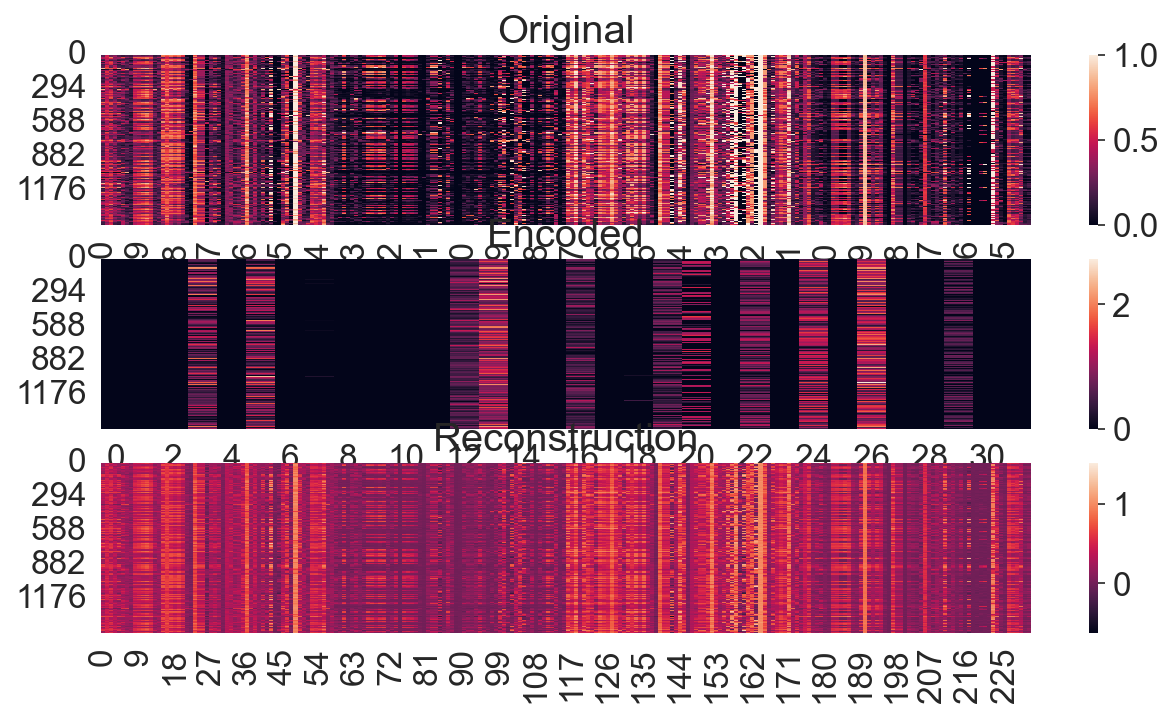

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5), dpi=150, sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.2)

sns.heatmap(val_dataset.numpy(), ax=ax1)
ax1.set_title('Original')

encoded = encoded.detach().numpy()
sns.heatmap(encoded, ax=ax2)
ax2.set_title('Encoded')

mm_scaler = MinMaxScaler()
reconstructed = reconstructed.detach().numpy()
# reconstructed = mm_scaler.fit_transform(reconstructed)
sns.heatmap(reconstructed, ax=ax3)
ax3.set_title('Reconstruction')

In [35]:
encoder = model.encoder
encoder.eval()

ae_desc = torch.as_tensor(mixed_dataset_desc.values, dtype=torch.float32)
ae_desc = pd.DataFrame(encoder(ae_desc).detach().numpy(), index=mixed_dataset_desc.index)

ae_desc.head(3)

Encoder(
  (layers): Sequential(
    (0): Linear(in_features=232, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
  )
)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
icsd_1,0.0,0.0,0.0,0.372941,0.0,0.322096,0.0,0.0,0.0,0.0,...,0.872540,0.0,0.586188,0.0,0.832125,0.0,0.0,0.268809,0.0,0.0
icsd_2,0.0,0.0,0.0,0.263343,0.0,0.300752,0.0,0.0,0.0,0.0,...,0.814297,0.0,0.471231,0.0,0.924868,0.0,0.0,0.140021,0.0,0.0
icsd_3,0.0,0.0,0.0,0.571887,0.0,0.089239,0.0,0.0,0.0,0.0,...,0.521568,0.0,0.478298,0.0,1.063830,0.0,0.0,0.130046,0.0,0.0


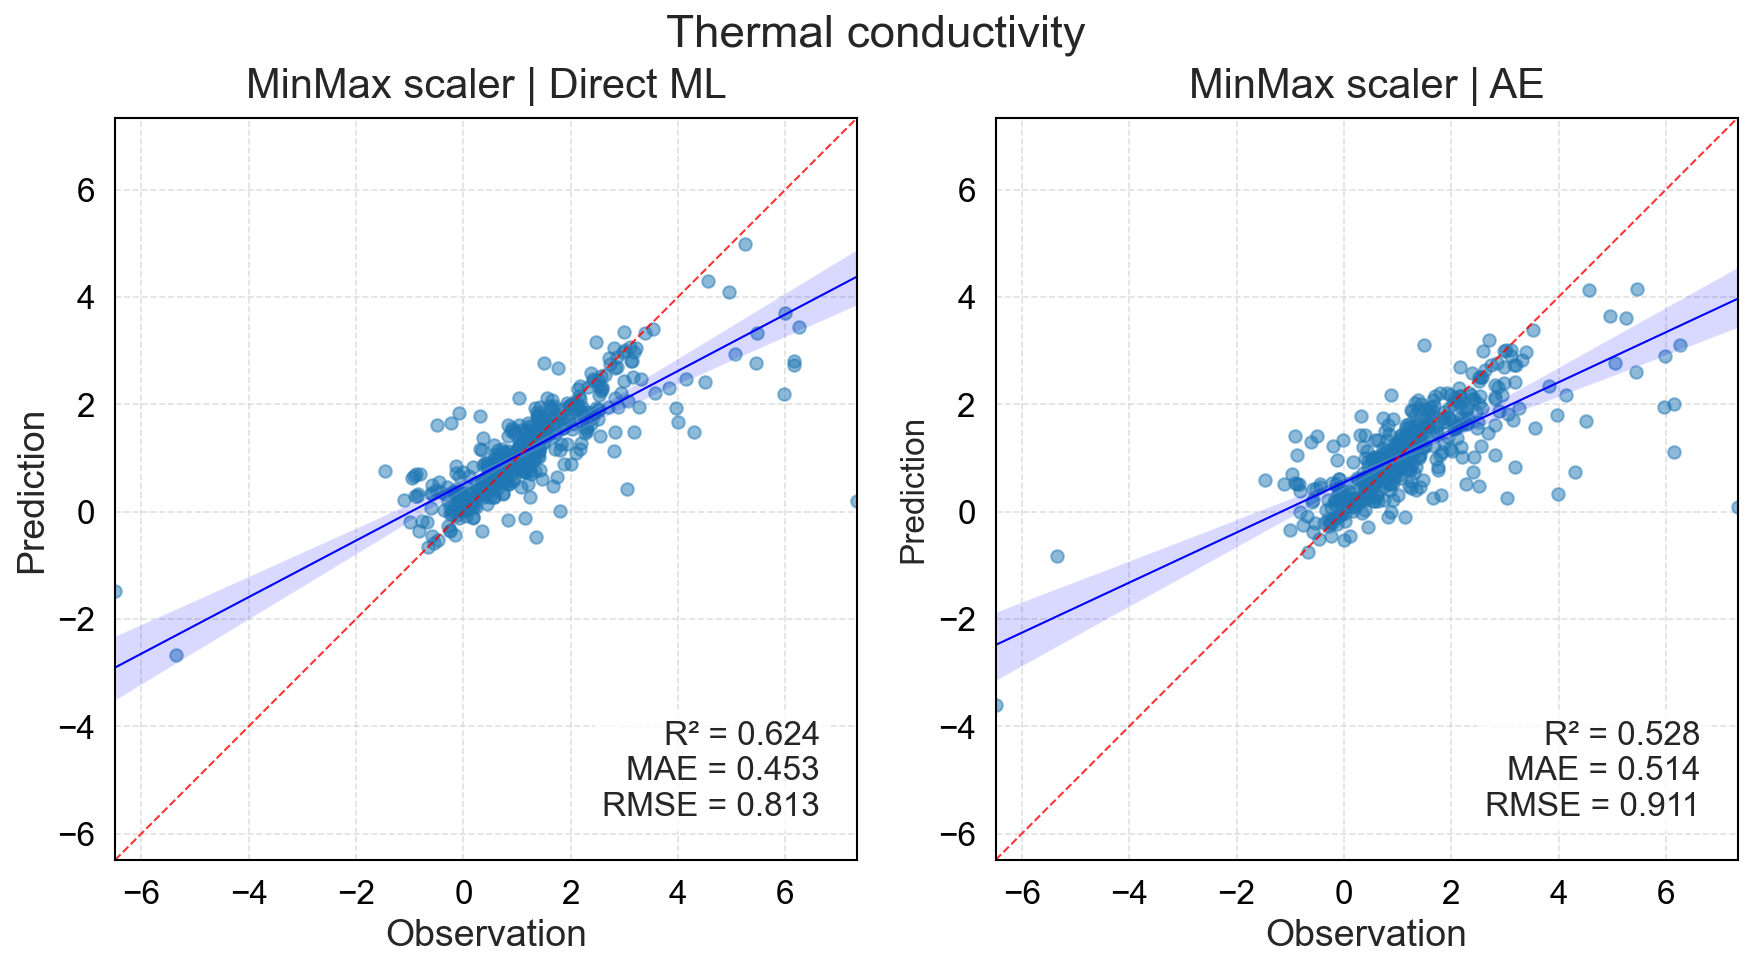

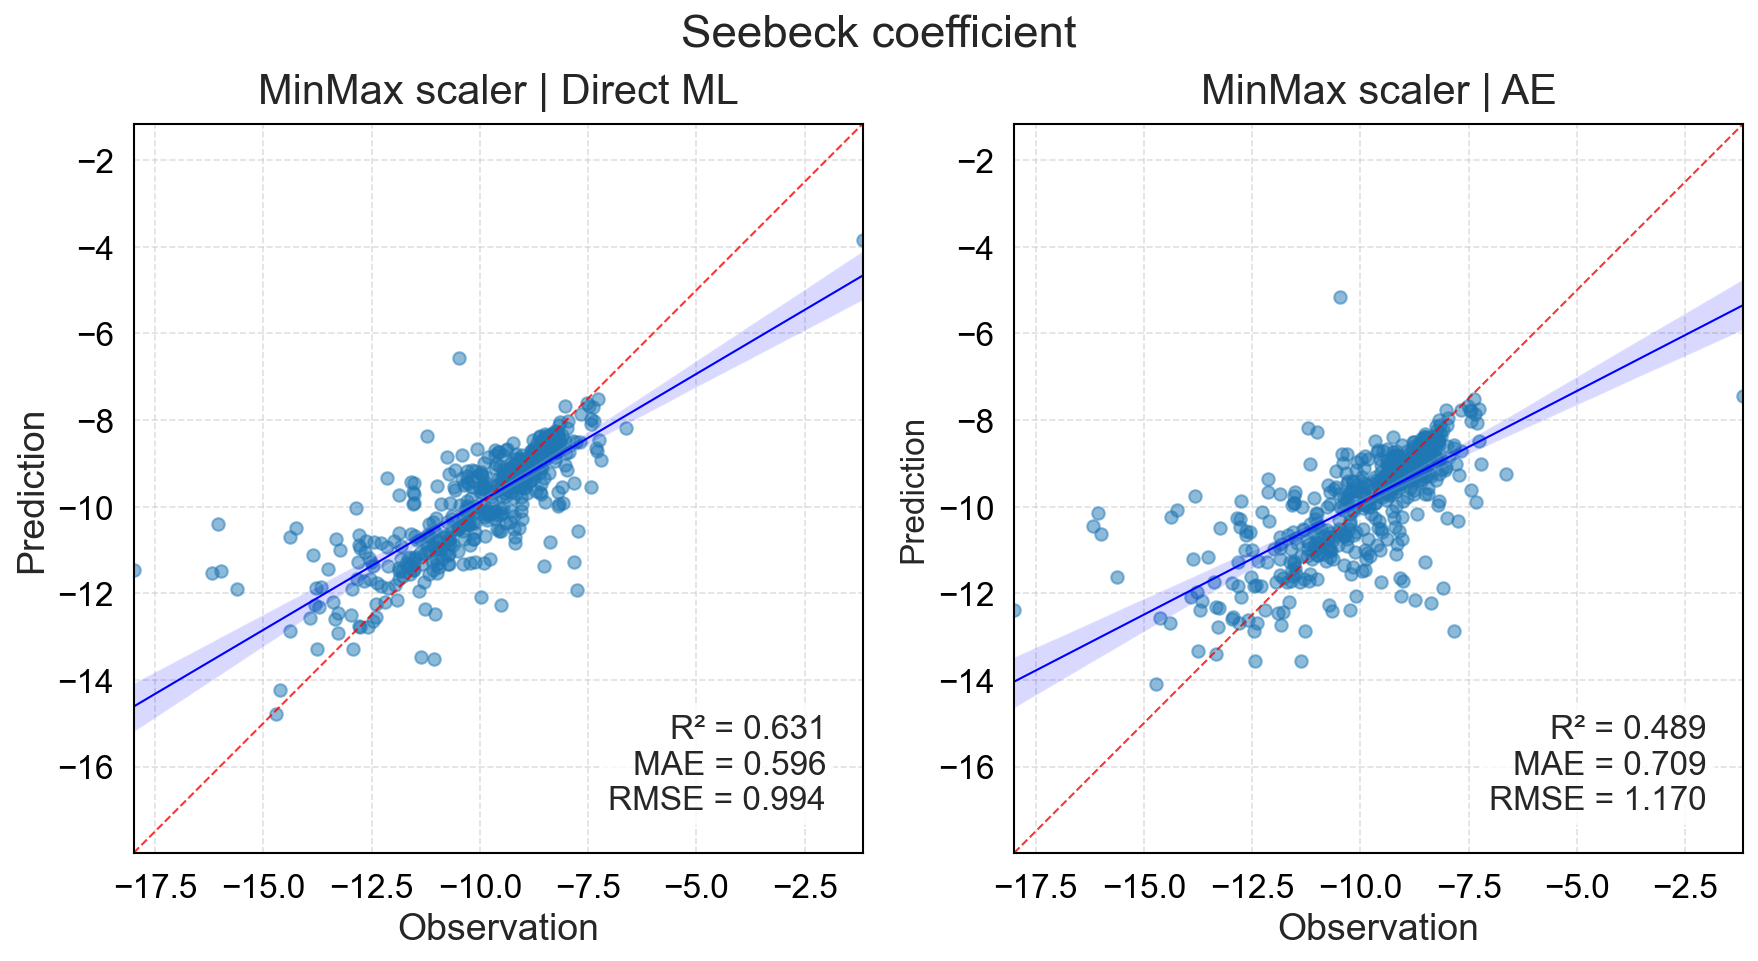

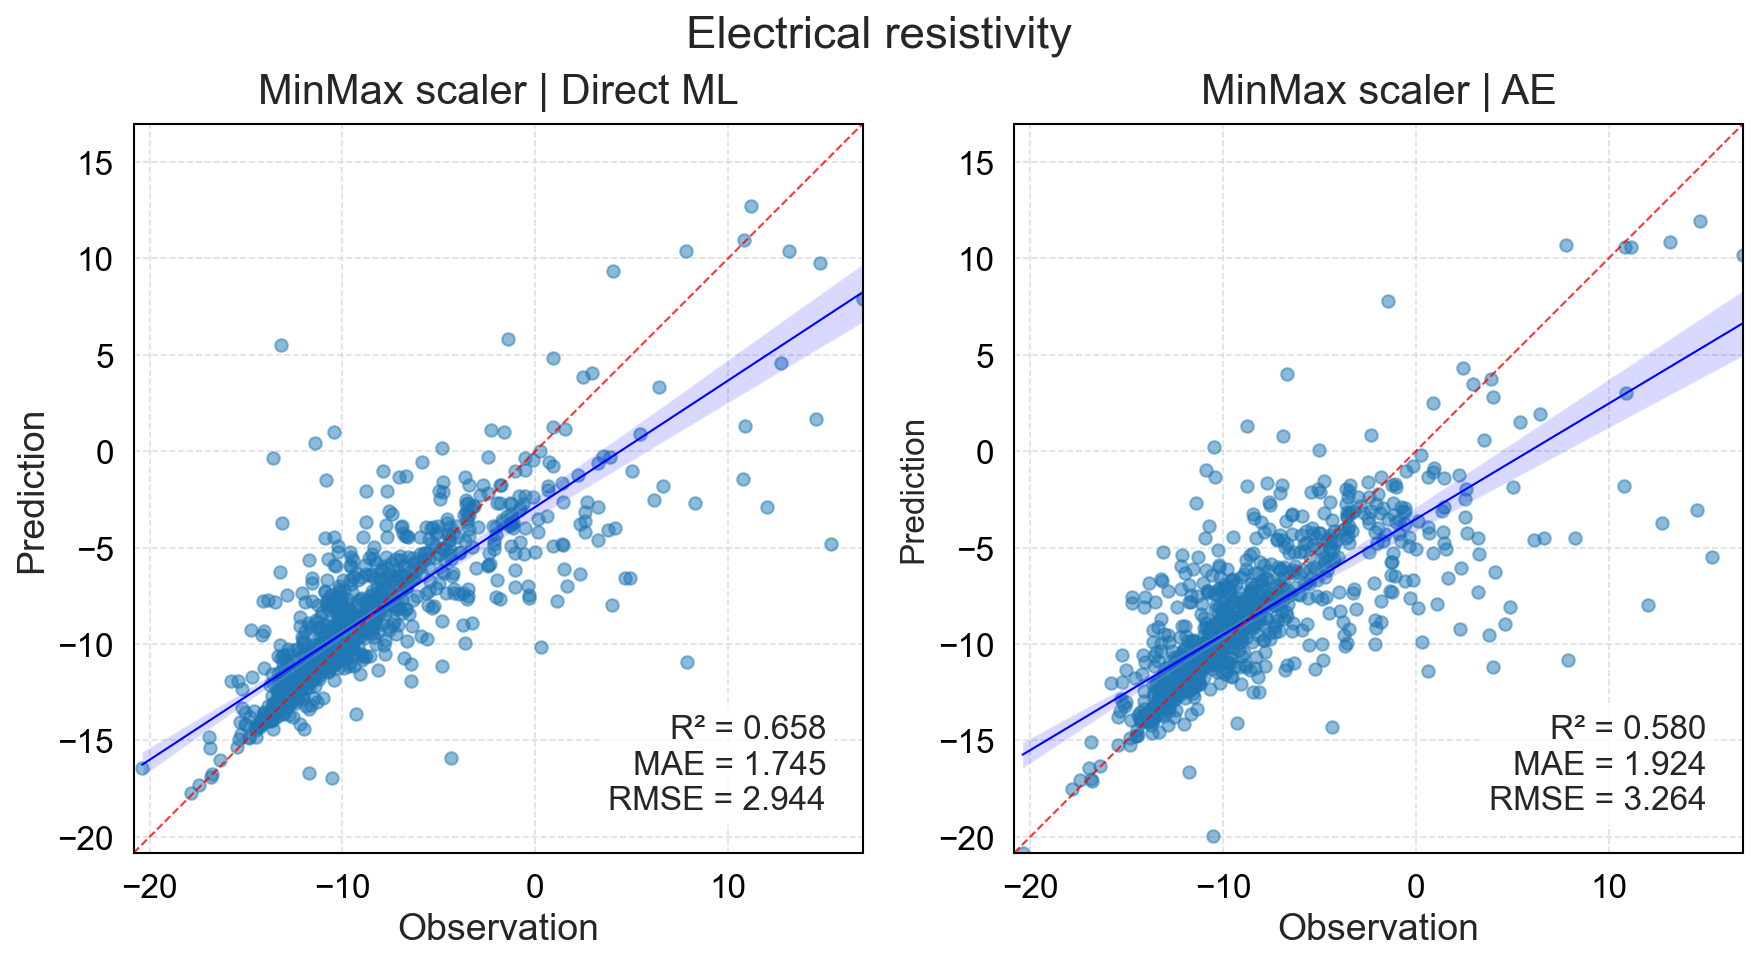

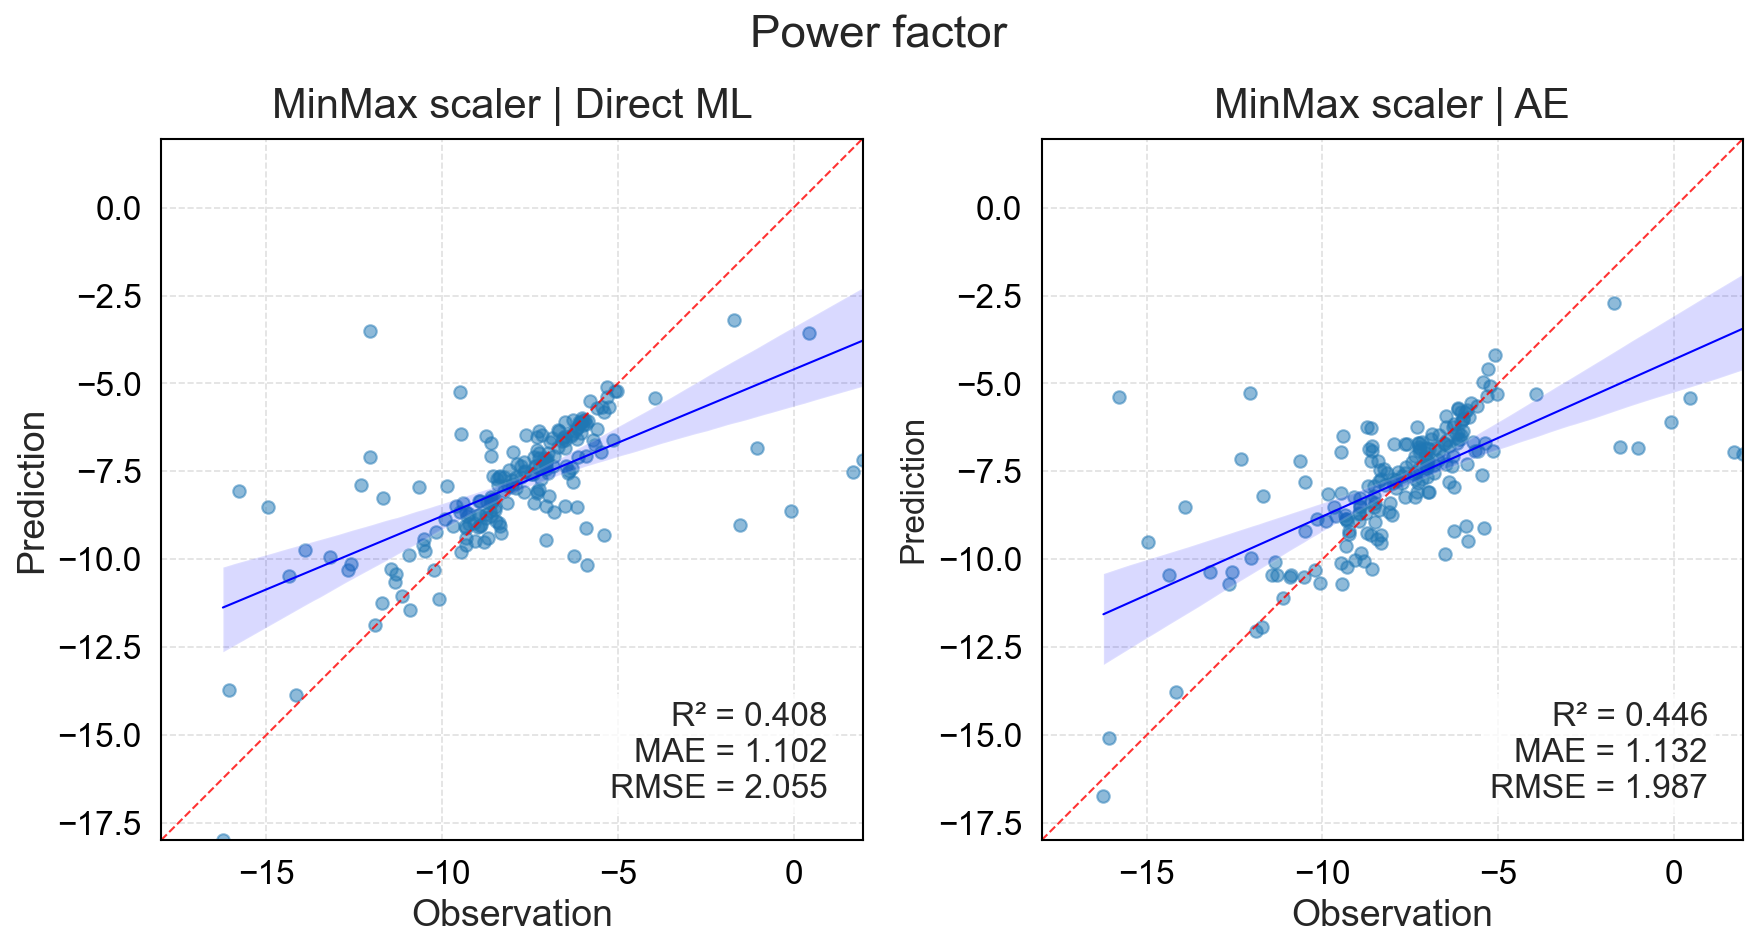

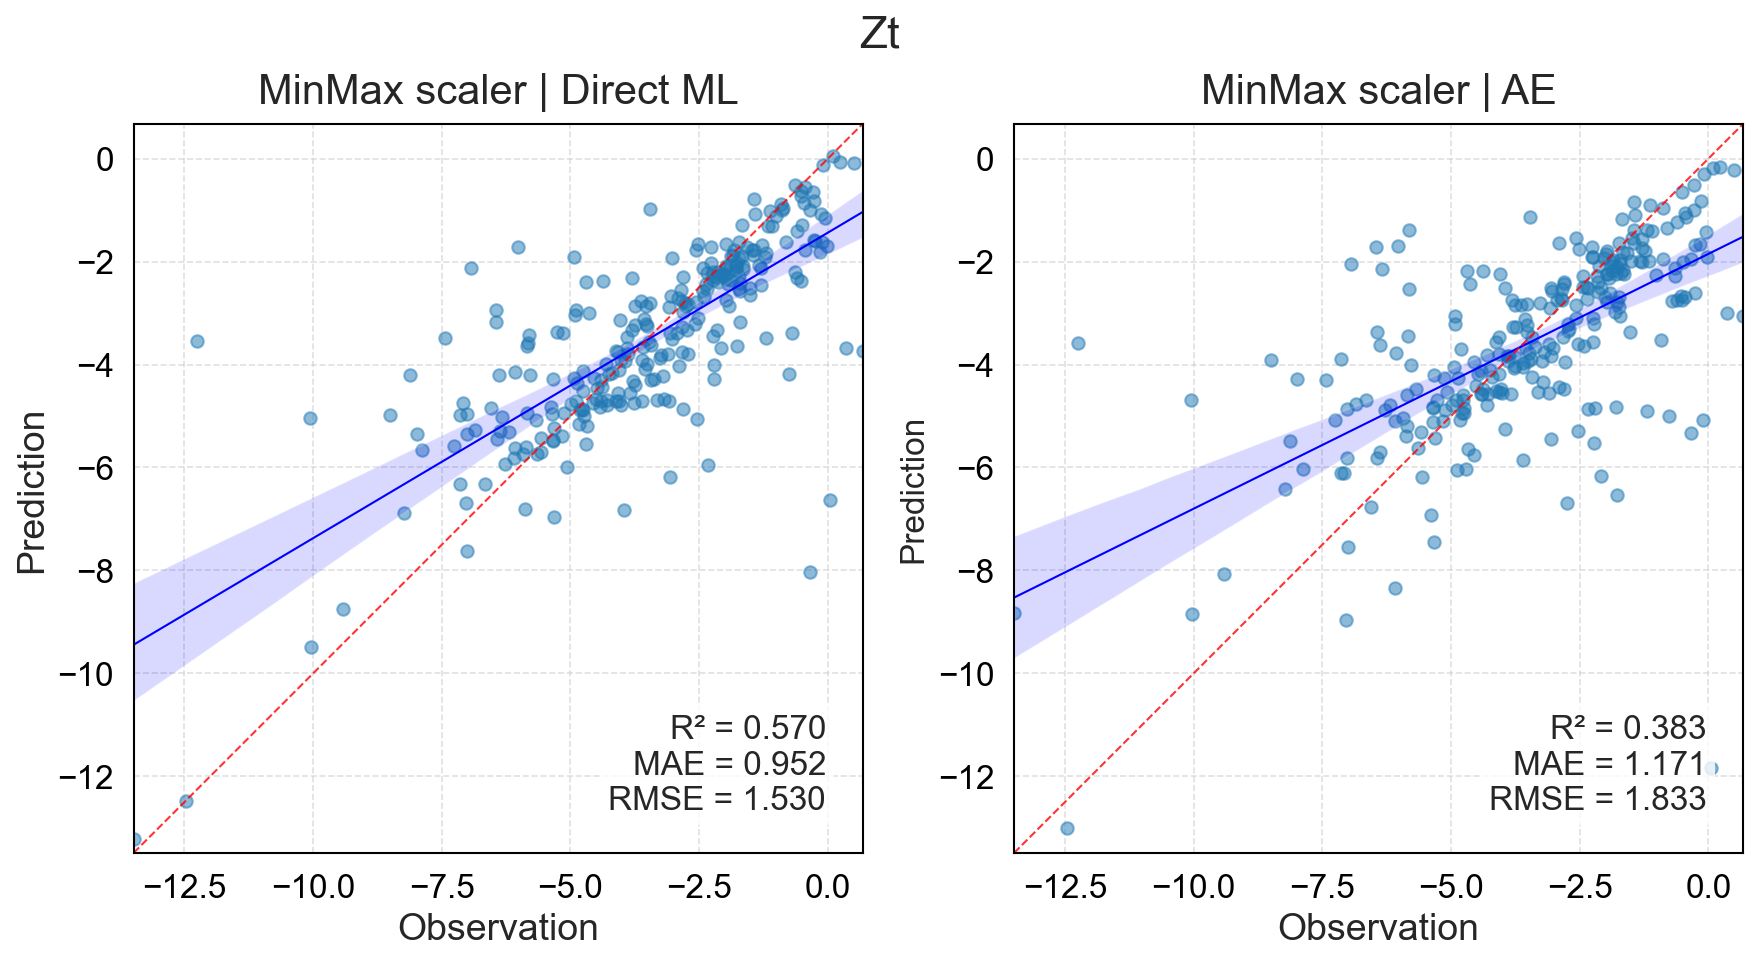

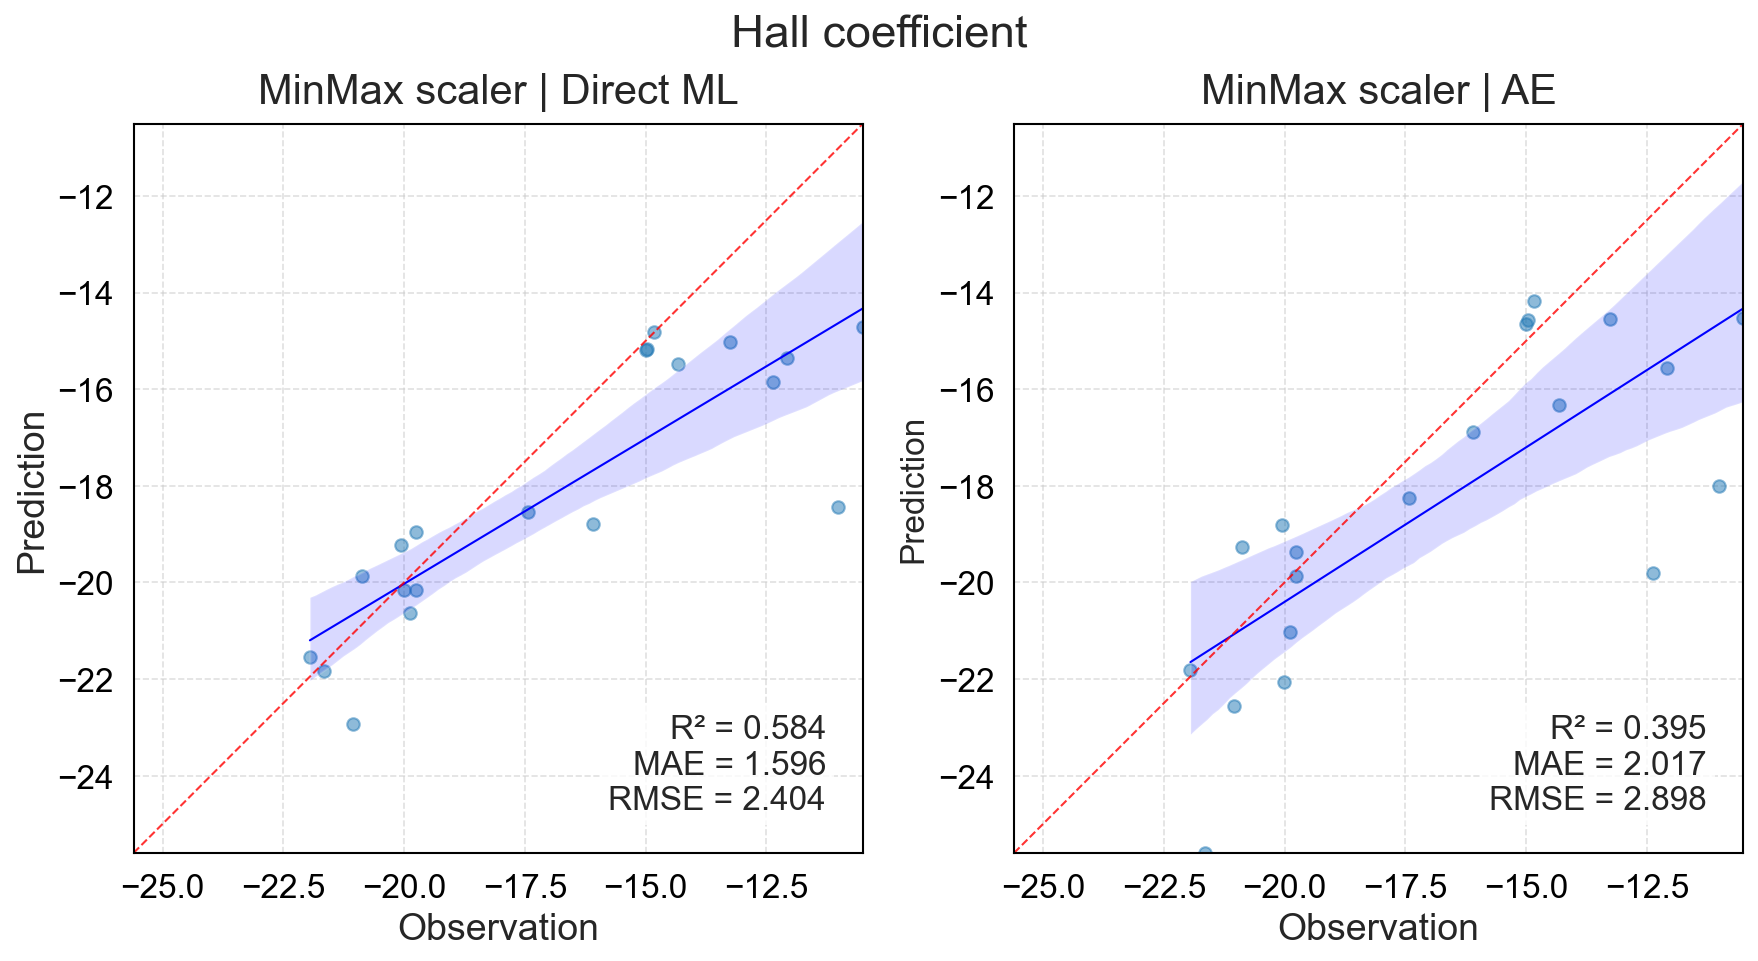

In [36]:
from sklearn.ensemble import RandomForestRegressor

for selected_prop in props:
    selected_prop_data = multi_prop_data[multi_prop_data[selected_prop].notna()][selected_prop]
    selected_prop_desc = multi_prop_desc.loc[selected_prop_data.index]
    selected_prop_ae_desc = ae_desc.loc[selected_prop_data.index]
    
    X_train, X_test, X_ae_train, X_ae_test, y_train, y_test = train_test_split(
        selected_prop_desc, selected_prop_ae_desc, selected_prop_data, test_size=0.2, random_state=0
    )
    
    rf_direct = RandomForestRegressor(n_estimators=200, n_jobs=10)
    _ = rf_direct.fit(X_train, y_train)
    
    rf_ae = RandomForestRegressor(n_estimators=20, n_jobs=10)
    _ = rf_ae.fit(X_ae_train, y_train)
    
    y_pred, y_true = rf_direct.predict(X_test), y_test
    y_ae_pred, y_ae_true = rf_ae.predict(X_ae_test), y_test
    
    fig, (ax1, ax2) = plot_scatter_comparison(y_true, y_pred, y_ae_true, y_ae_pred,
                                            labels=('MinMax scaler | Direct ML', 'MinMax scaler | AE'),
                                            title=selected_prop)
    fig.savefig(f'images/{selected_prop}_qc_ac_te_data_size={uesd_desc.shape[0]}.png')

In [24]:
# qc_ac_te_ae_desc = ae_desc.loc[multi_prop_data.index]
qc_ac_te_ae_desc = multi_prop_desc.loc[multi_prop_data.index]